<a href="https://colab.research.google.com/github/gonzalezzayra/EDP-I/blob/main/Membrana_vibratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Membrana vibratoria**

La solución completa general de la ecuación de onda bidimensional sobre un rectángulo en el plano cartesiano (que modela la vibración de una membrana cuadrada). Luego aplicar la solución general a la función dada en la imagen, considerar que $g(x) = 0$.


1.   $\frac{∂^2 u }{∂ t^2} = c^2 \left(\frac{\partial^2 u}{\partial x^2} +\frac{\partial^2 u}{\partial y^2}\right)$
que satisfaga la condición de frontera

2. $u=0$ en la frontera de la membrana para toda $t\geq0$ y las dos condiciones iniciales

3.    $u(x,y,0) = f(x,y)$ [dado el desplazamiento inicialf(x,y)] y

4.   $\frac{∂ u}{∂t} = g(x,y)$ [dada la velocidad inicial g(x,y)].


$u(x,y,t)$ da el desplazamiento del punto $(x,y)$ de la membrana desde el reposo ($u=0$) en el tiempo t. Se observa que las condiciones 2 a 4 son similares a las de la cuerda vibratoria.


In [ ]:
#Importar librerias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import cm

In [ ]:
#Parámetros
a = 4  #Lo que mide de ancho/lo que mide en x
b = 2  #Lo que mide en y
c = 1  #Se le da el valor de 1
M = 20  #Es el máximo

In [ ]:
#Función de desplazamiento inicial
def f(x, y):
    return 0.1 * (4*x - x**2) * (2*y - y**2)

In [ ]:
#Calcular coeficientes A_mn y frecuencias lambda_mn para m, n impares
#A_mn = 2048/5*pi**6 1/m**3 n**3
#lambda_mn = lambd = (pi/4) * sqrt(m**2 + 4*n**2)

#Calculamos para los impares
m_impares = np.arange(1, M+1, 2)  #Para m=1,3,5,...,19
n_impares = np.arange(1, M+1, 2)  #Para n=1,3,5,...,19

#Constante para A_mn
const_A = 2048 / (5 * np.pi**6)

#Listas para A_mn y lambda_mn
A_mn = []
lambda_mn = []
#Generamos un ciclo for
for m in m_impares:
    for n in n_impares:
        A = const_A / (m**3 * n**3)
        lambd = (np.pi/4) * np.sqrt(m**2 + 4*n**2)
        A_mn.append(A) #Adjuntar a la lista de A_mn
        lambda_mn.append(lambd) #Adjuntar a la lista de lambda_mn

#Convertir a arrays para operaciones eficientes
A_mn = np.array(A_mn)
lambda_mn = np.array(lambda_mn)

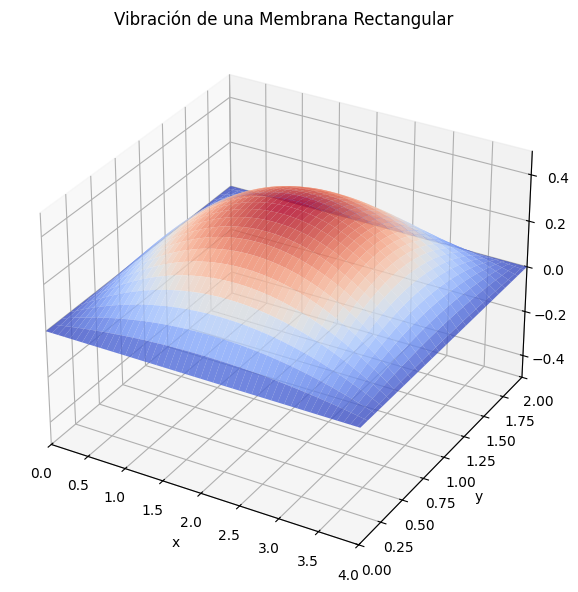

In [12]:
#Para la gráfica
#Crear malla espacial
Nx, Ny = 100, 50  #Resolución de la malla
x = np.linspace(0, a, Nx)
y = np.linspace(0, b, Ny)
X, Y = np.meshgrid(x, y)

#Función para calcular u(x, y, t)
def u(t):
    U = np.zeros((Ny, Nx))  #Inicializar desplazamiento
    idx = 0  #Índice para recorrer A_mn y lambda_mn
    for m in m_impares:
        for n in n_impares:
            #Modos espaciales
            modo_espacial = np.sin(m * np.pi * X / a) * np.sin(n * np.pi * Y / b)
            #Término temporal
            term_temporal = np.cos(lambda_mn[idx] * c * t)
            #Sumar contribución del modo (m,n)
            U += A_mn[idx] * term_temporal * modo_espacial
            idx += 1
    return U

#Configurar figura para animación
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
ax.set_zlabel('u ')
ax.set_title('Vibración de una Membrana Rectangular')
ax.set_xlim(0, a)
ax.set_ylim(0, b)
ax.set_zlim(-0.5, 0.5)

#Graficar superficie inicial en t=0
U0 = u(0)
surf = ax.plot_surface(X, Y, U0, cmap=cm.coolwarm, rstride=2, cstride=2, alpha=0.8)

#Función de actualización para la animación
def update(frame):
    t = frame * 0.1
    ax.clear()
    ax.set_xlabel('x ')
    ax.set_ylabel('y ')
    ax.set_zlabel('u ')
    ax.set_title(f'Desplazamiento de la Membrana en t = {t:.1f} s')
    ax.set_xlim(0, a)
    ax.set_ylim(0, b)
    ax.set_zlim(-0.5, 0.5)
    U = u(t)
    surf = ax.plot_surface(X, Y, U, cmap=cm.coolwarm, rstride=2, cstride=2, alpha=0.8)
    return surf,

#Crear animación
ani = FuncAnimation(fig, update, frames=100, interval=100, blit=False)
plt.tight_layout()
plt.show()